**SMS Classifier System**

An SMS spam classifier is a system that automatically identifies whether a message is genuine or spam. It analyzes the text of incoming messages to detect patterns commonly used in promotional or fraudulent content. By filtering out suspicious messages, it helps prevent users from being exposed to scams, unwanted promotions, or irrelevant notifications. Overall, it improves user safety and ensures a cleaner and more efficient messaging experience.

**Introduction**

An SMS spam classifier uses machine learning and natural language processing techniques to categorize messages into spam or non-spam (ham). The text data is first preprocessed by removing stop words, punctuation, and converting words to lowercase. Features are extracted using methods like TF-IDF or Bag-of-Words to convert the text into numerical vectors. A classification algorithm—such as Naive Bayes, Logistic Regression, or SVM—is then trained on labeled data to learn patterns commonly associated with spam. Once trained, the model can automatically predict and filter spam messages with high accuracy.

**Importing Standard Libraries**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [106]:
data=pd.read_csv('spam.csv', encoding='latin-1')

**Generating 5 Random rows**

In [107]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4713,ham,Oops i thk i dun haf enuff... I go check then ...,NaN,NaN,NaN
3650,ham,Want to send me a virtual hug?... I need one,NaN,NaN,NaN
4054,ham,When is school starting. Where will you stay. ...,NaN,NaN,NaN
2576,ham,In sch but neva mind u eat 1st lor..,NaN,NaN,NaN
3032,ham,"Aight, lemme know what's up",NaN,NaN,NaN


**Shape of the Dataset**

In [108]:
data.shape

(5572, 5)

**To seek information about the dataset**

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Dropping Unnecessary Columns**

In [110]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

**Random Sampling**

In [111]:
data.sample(10)

,v1,v2
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...
3744,ham,"Aight, let me know when you're gonna be around..."
2522,ham,Dunno lei... I might b eatin wif my frens... I...
4372,ham,Me fine..absolutly fine
577,ham,ÌÏ wait 4 me in sch i finish ard 5..
1731,ham,Lol. Well quality aint bad at all so i aint co...
2195,ham,V-aluable. A-ffectionate. L-oveable. E-ternal....
2616,ham,I went to ur hon lab but no one is there.
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
4927,ham,Just hopeing that wasnÛ÷t too pissed up to re...


**Renaming the columns**

In [112]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

**Random Sampling**

In [113]:
data.sample(5)

,target,text
2969,ham,U should make a fb list
4369,spam,Do you want a new Video handset? 750 any time ...
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can..."
908,ham,WHITE FUDGE OREOS ARE IN STORES
2776,ham,Send me your id and password


**Sneak Peek into the front Rows**

In [114]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Checking for the Null Values**

In [115]:
data.isnull().sum()

,0
target,0
text,0


**Checking the Duplicate Values**

In [116]:
data.duplicated().sum()

np.int64(403)

In [117]:
data=data.drop_duplicates(keep='first')

In [118]:
data.duplicated().sum()

np.int64(0)

**Checking the shape after removing the duplicate values**

In [119]:
data.shape

(5169, 2)

**EDA (Exploratory Data Analysis)**

In [120]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Counting the Unique values in the target column and plotting a pie graph**

In [121]:
data['target'].value_counts()

,count
target,
ham,4516
spam,653


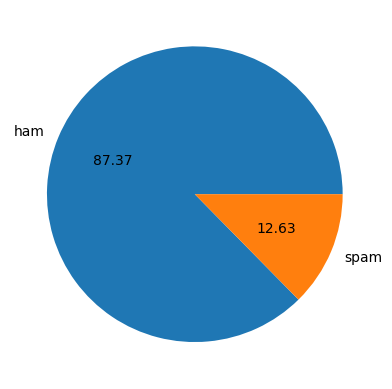

In [122]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

**Installing NLTK**

In [123]:
pip install nltk

In [124]:
import nltk

In [125]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Creating a new Column num_alphabets**

In [126]:
data['num_alphabets']=data['text'].apply(len)

In [127]:
data.head()

,target,text,num_alphabets
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Creating a new column Num_words**

In [128]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [129]:
data.head()

,target,text,num_alphabets,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [130]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [131]:
data.head()

,target,text,num_alphabets,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [132]:
data[['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [135]:
data['target'] = data['target'].map({'ham': 0, 'spam': 1})
data[data['target']==0][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [136]:
data[data['target']==1][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_alphabets', ylabel='Count'>

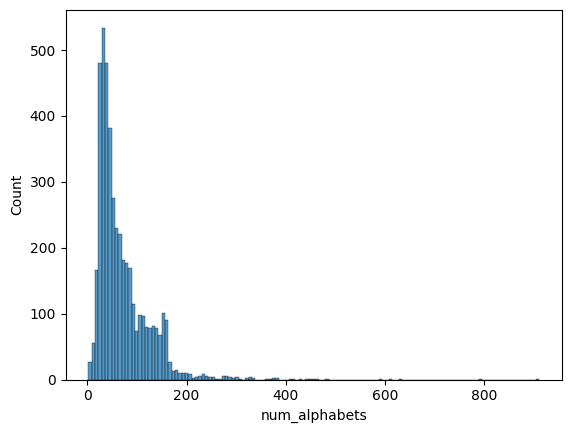

In [137]:
sns.histplot(data[data['target']==0]['num_alphabets'])




<Axes: xlabel='num_alphabets', ylabel='Count'>

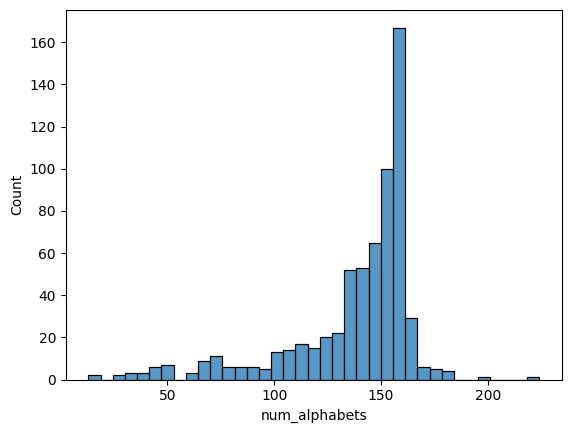

In [138]:
sns.histplot(data[data['target']==1]['num_alphabets'])


<Axes: xlabel='num_alphabets', ylabel='Count'>

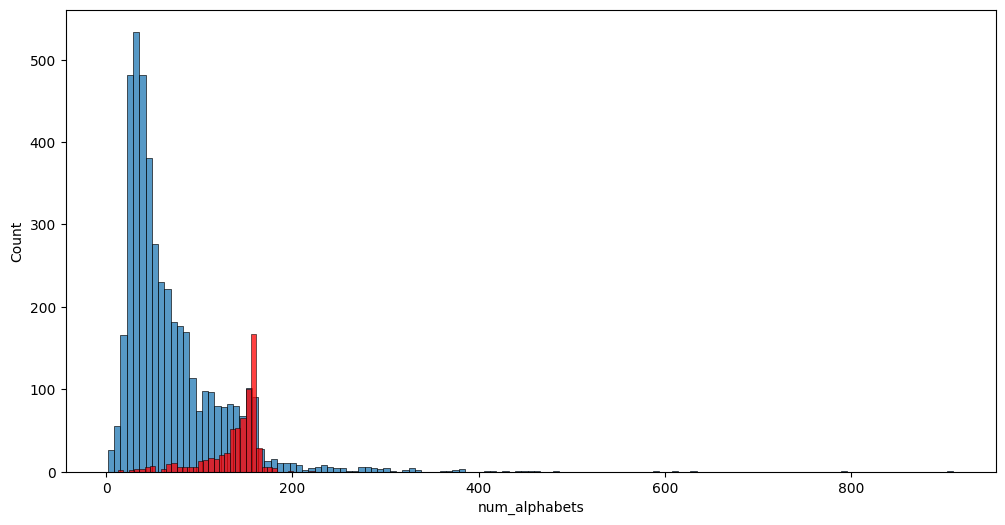

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_alphabets'])
sns.histplot(data[data['target']==1]['num_alphabets'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

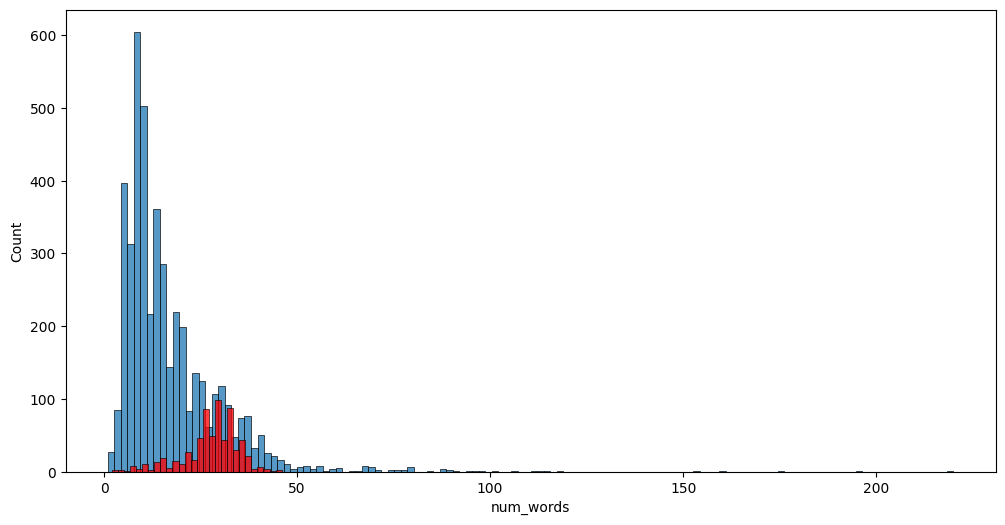

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

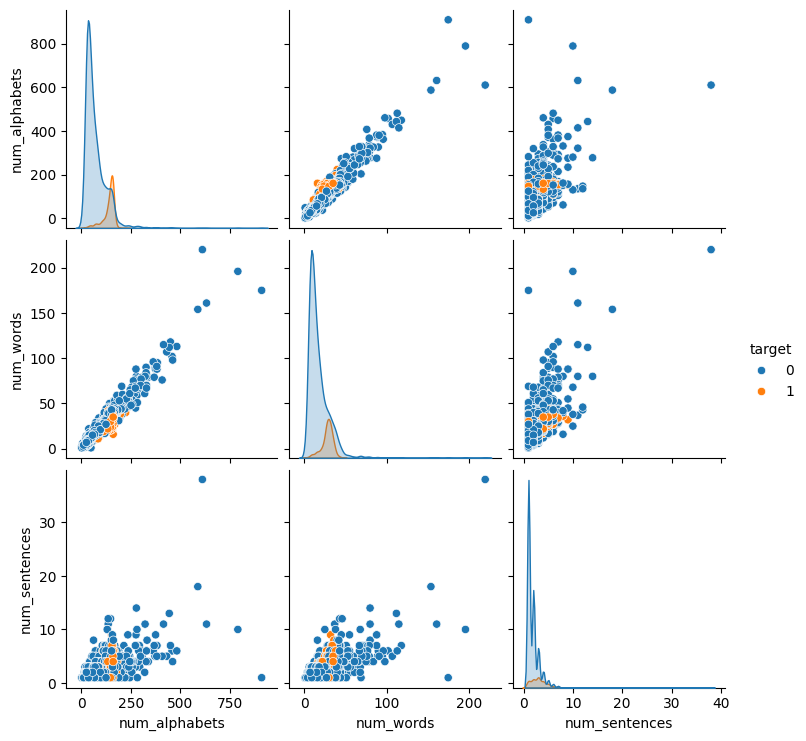

In [140]:
sns.pairplot(data,hue='target')

<Axes: >

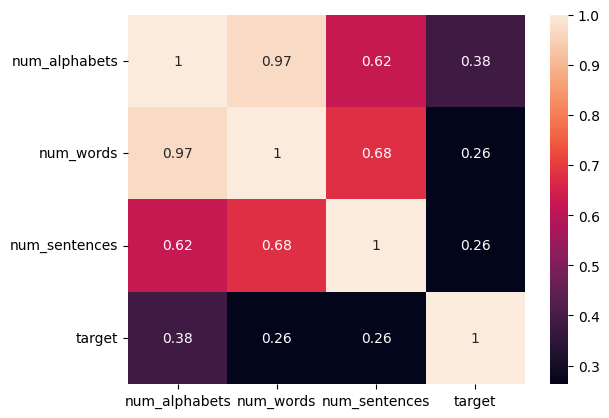

In [141]:
sns.heatmap(data[['num_alphabets','num_words','num_sentences', 'target']].corr(), annot=True)

data preprocessing

In [142]:
import string
import nltk
from nltk.corpus import stopwords

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

In [143]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [144]:
transform_text("Hi, How are you?")

'hi'

In [145]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
transform_text("Hi, I am Anushka Yadav")

'hi anushka yadav'

In [147]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [148]:
data['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [149]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [150]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [151]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [152]:
data['transformed text']=data['text'].apply(transform_text)

In [153]:
data.head()

,target,text,num_alphabets,num_words,num_sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [154]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [155]:
spam_wc=wc.generate(data[data['target']==1]['transformed text'].str.cat(sep=" "))

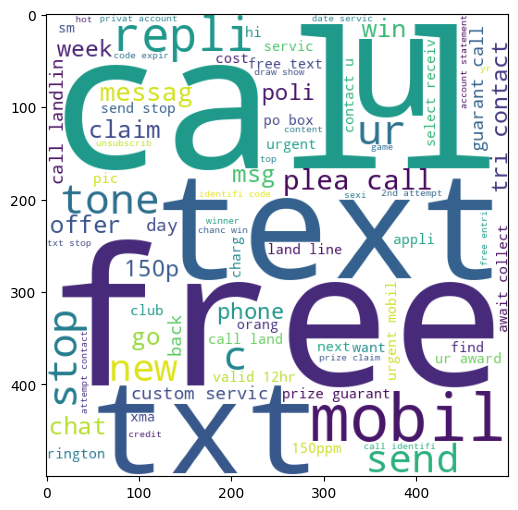

In [156]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [157]:
ham_wc=wc.generate(data[data['target']==0]['transformed text'].str.cat(sep=" "))

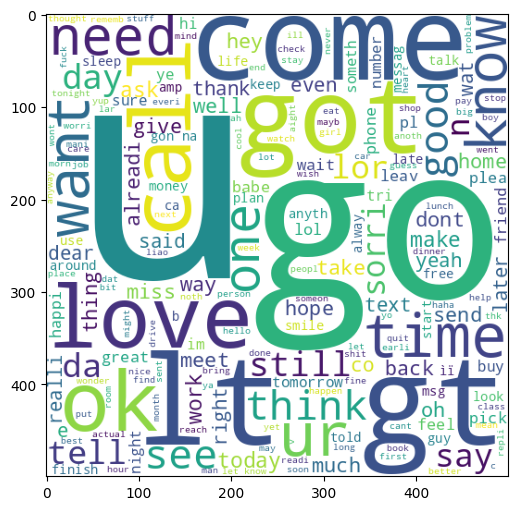

In [158]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [159]:
data.head()

,target,text,num_alphabets,num_words,num_sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [160]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [161]:
len(spam_corpus)

9939

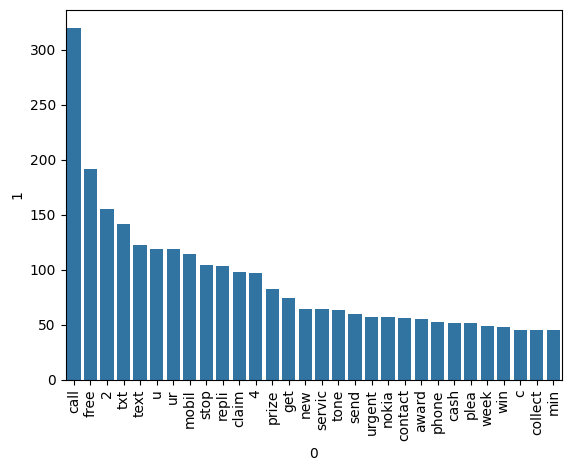

In [162]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [163]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [164]:
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

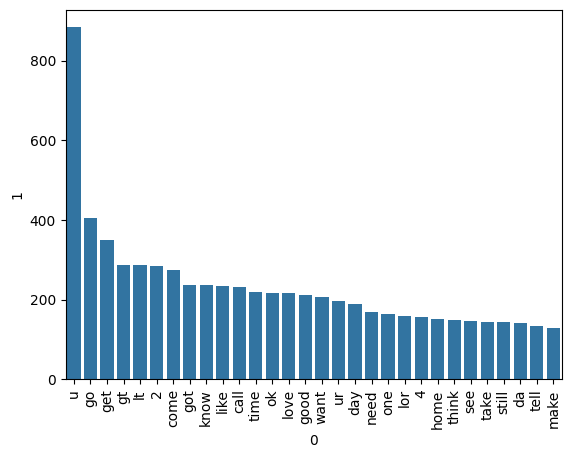

In [165]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

model building

In [166]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [167]:
x=tfidf.fit_transform(data['transformed text']).toarray()

In [168]:
x.shape

(5169, 6708)

In [169]:
y=data['target'].values

In [170]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [173]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [174]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [175]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[795 101]
 [ 25 113]]
0.5280373831775701


In [176]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [177]:
bnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [179]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [180]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [181]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [182]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9819819819819819
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9230769230769231
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.952


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [99]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.983193
5,RF,0.970019,0.981982
0,SVC,0.972921,0.974138
10,xgb,0.975822,0.952000
4,LR,0.952611,0.949495
9,GBDT,0.951644,0.923077
7,BgC,0.957447,0.861538
6,AdaBoost,0.924565,0.840909


In [100]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [101]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.970019
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.975822
6,LR,Accuracy,0.952611
7,GBDT,Accuracy,0.951644
8,BgC,Accuracy,0.957447
9,AdaBoost,Accuracy,0.924565


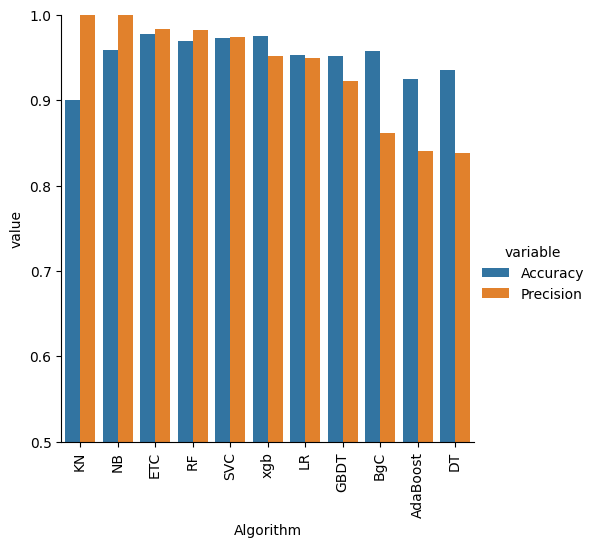

In [102]:
sns.catplot(x = 'Algorithm', y='value',
  hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [185]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [186]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [187]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [188]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
3,RF,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982,0.970019,0.981982
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,xgb,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000
6,LR,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495
7,GBDT,0.951644,0.923077,0.951644,0.923077,0.951644,0.923077,0.951644,0.923077
8,BgC,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538,0.957447,0.861538
9,AdaBoost,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909


In [189]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [190]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [192]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [193]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [194]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276


In [195]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [196]:
from sklearn.ensemble import StackingClassifier

In [197]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [198]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9253731343283582


In [200]:
import pickle
pickle.dump(tfidf,open('vectoriser.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))